<a href="https://colab.research.google.com/github/orimejia/Proyecto-AI/blob/main/02_Exploraci%C3%B3n_de_datos_ENTREGAFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [17]:
url = 'https://raw.githubusercontent.com/HernanAC/TaiwaneseBankruptcyPrediction/main/simulated_data.csv'
data = pd.read_csv(url)

# **02 - Data Exploration**

## Dataset modificado

In [18]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,MEDIUM,MEDIUM,MEDIUM,NaN,0.601457,0.998969,0.796887,0.808809,LOW,...,HIGH,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,MEDIUM,MEDIUM,MEDIUM,0.610235,0.610235,0.998946,0.797380,0.809301,LOW,...,HIGH,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,MEDIUM,MEDIUM,MEDIUM,0.601450,0.601364,0.998857,0.796403,0.808388,LOW,...,HIGH,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,MEDIUM,MEDIUM,MEDIUM,0.583541,0.583541,0.998700,0.796967,0.808966,LOW,...,HIGH,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,MEDIUM,MEDIUM,MEDIUM,0.598783,0.598783,0.998973,0.797366,0.809304,LOW,...,HIGH,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [19]:
data.shape

(6819, 96)

## Característica objetivo

In [20]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, '¿Bancarrota?')

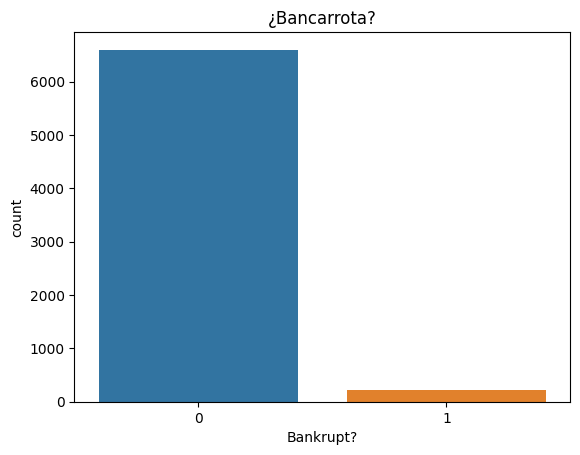

In [21]:
sns.countplot(x=data['Bankrupt?'])
plt.title('¿Bancarrota?')

## Valores nulos

In [22]:
data.isnull().sum()

Bankrupt?                                                      0
 ROA(C) before interest and depreciation before interest       0
 ROA(A) before interest and % after tax                        0
 ROA(B) before interest and depreciation after tax             0
 Operating Gross Margin                                     1364
                                                            ... 
 Liability to Equity                                           0
 Degree of Financial Leverage (DFL)                            0
 Interest Coverage Ratio (Interest expense to EBIT)            0
 Net Income Flag                                               0
 Equity to Liability                                           0
Length: 96, dtype: int64

In [23]:
nulos = data.isna().sum() 
nulos [nulos != 0]

 Operating Gross Margin         1364
 Cash Turnover Rate             1364
 Current Liability to Equity    1364
dtype: int64

## Columnas categóricas

In [24]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index
categorical_features2 = data.dtypes[data.dtypes == 'object'].index
data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [25]:
categorical_features2 = data.dtypes[data.dtypes == 'object'].index
data[categorical_features2].columns.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Inventory Turnover Rate (times)',
 ' Working Capital/Equity',
 ' Cash Flow to Sales',
 ' Net Income to Total Assets']

## Valores duplicados

In [26]:
data.duplicated().sum()

0

## Información de los datos

In [27]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

##Inspección de datos numéricos

In [28]:
data._get_numeric_data().describe().T


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.000000,0.000000,0.000000,0.000000,1.0
Operating Gross Margin,5455.0,0.608066,0.015624,0.156308,0.600492,0.606048,0.613842,1.0
Realized Sales Gross Margin,6819.0,0.607929,0.016916,0.000000,0.600434,0.605976,0.613842,1.0
Operating Profit Rate,6819.0,0.998755,0.013010,0.000000,0.998969,0.999022,0.999095,1.0
Pre-tax net Interest Rate,6819.0,0.797190,0.012869,0.000000,0.797386,0.797464,0.797579,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.000000,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.000000,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.000000,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0


##Inspección de datos categóricos

In [29]:
for column in categorical_features2:
  print(column)
  df = pd.DataFrame(data[column].value_counts())
  df.columns = ['']
  print (df)
  print ('')

 ROA(C) before interest and depreciation before interest
            
MEDIUM  6688
HIGH      75
LOW       56

 ROA(A) before interest and % after tax
            
MEDIUM  6470
HIGH     295
LOW       54

 ROA(B) before interest and depreciation after tax
            
MEDIUM  6540
HIGH     241
LOW       38

 Non-industry income and expenditure/revenue
            
LOW     6815
HIGH       2
MEDIUM     2

 Inventory Turnover Rate (times)
            
LOW     3868
HIGH    2947
MEDIUM     4

 Working Capital/Equity
            
HIGH    6814
MEDIUM     4
LOW        1

 Cash Flow to Sales
            
HIGH    6816
MEDIUM     2
LOW        1

 Net Income to Total Assets
            
HIGH    6766
MEDIUM    51
LOW        2

